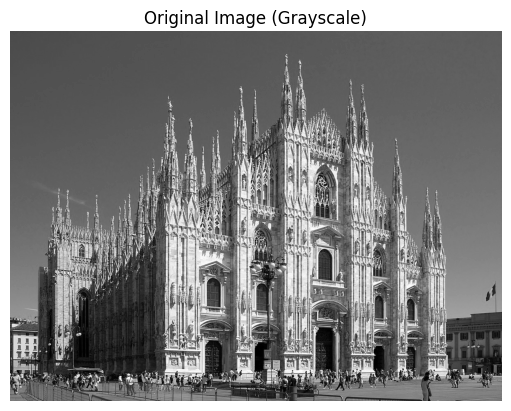

Shape of the image: (902, 1200)


In [104]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread

# Load the image and preprocess
image_path = './data/duomo.jpg'
img = imread(image_path)

# Convert to grayscale by averaging across RGB channels
A = np.mean(np.array(img, dtype=np.float64) / 255, axis=-1)

# Display the image
plt.imshow(A, cmap='gray')
plt.axis('off')
plt.title("Original Image (Grayscale)")
plt.show()

# Display shape of the image
print("Shape of the image:", A.shape)


# Exercise 1

1. **Compute the SVD**:
    - Compute the SVD associated with the picture, by using the standard algorithm, that gives the exact (up to round-off errors) decomposition. Then, plot the trend with respect to \( i \) of the singular values \( \sigma_i \).
    - Repeat the computation by considering the randomized SVD algorithm of rank \( k = 25, 50, 100, 200, 400 \). Plot the approximate singular values together with the exact singular values. Comment what you see.

In [105]:
U, s, VT = np.linalg.svd(A, full_matrices=False)

In [106]:
def randomized_SVD(A, k):
  m, n = A.shape
  P = np.random.randn(n, k) #generates random numbers according to the standard normal distribution
  '''
  you want to extract 
  the most prominent features 
  that are in the columns
  '''
  Z = A @ P
  Q, R = np.linalg.qr(Z)
  Y = Q.T @ A # QR factorization
  Uy, sy, VTy = np.linalg.svd(Y, full_matrices = False)
  U = Q @ Uy
  return U, sy, VTy

In [107]:
ks = [25, 50, 100, 200, 400]

results = {"Exact": s}
for k in ks:
    Uk, sk, VTk = randomized_SVD(A, k)
    results[f"k:{k}"] = sk

In [108]:
results_rsvd = results.copy()
del results_rsvd["Exact"]
results_rsvd

{'k:25': array([464.50027272,  72.87035196,  41.63345595,  35.46218937,
         30.35446175,  28.38985873,  22.61103743,  21.9005103 ,
         20.27236105,  19.32599896,  17.28057971,  16.61309342,
         14.31086919,  13.42174367,  13.07287529,  12.63894952,
         12.3459065 ,  11.45288438,  10.54525883,  10.14307821,
          9.68177971,   9.47552103,   9.41745234,   8.94956765,
          8.40162988]),
 'k:50': array([464.78545024,  74.93953401,  43.94396044,  39.35193405,
         34.453637  ,  31.71285517,  26.94696373,  24.61806476,
         23.98084955,  22.071938  ,  20.00381914,  19.49362381,
         18.4405911 ,  17.7394285 ,  16.14957176,  15.18547854,
         14.68513716,  14.36683101,  14.24885142,  12.94900425,
         12.55348169,  12.31640439,  11.90077464,  11.6111381 ,
         11.14100541,  10.89116238,  10.81312222,  10.59619106,
         10.25366589,   9.69134102,   9.51584799,   9.10748529,
          8.9436071 ,   8.90515498,   8.8012317 ,   8.56444093,


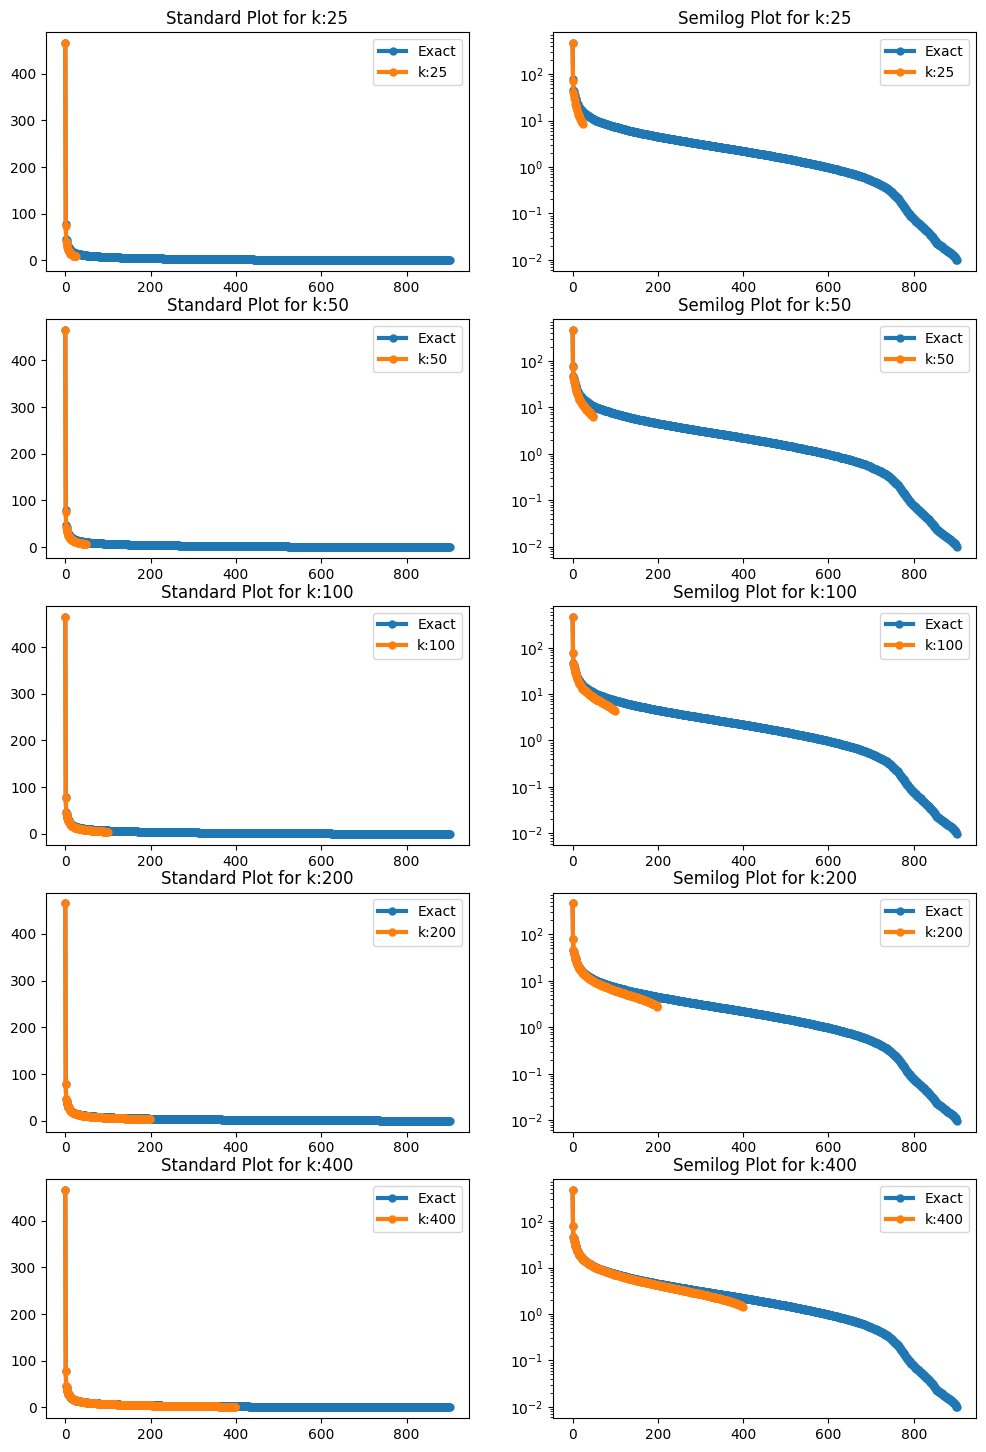

In [109]:
fig, axs = plt.subplots(len(ks), 2, figsize=(12,18))

i=0
for key, value in results_rsvd.items():
        # Left column: Standard plot
    axs[i, 0].plot(s, "o-", label="Exact", linewidth=3, markersize=5)
    axs[i, 0].plot(value, "o-", label=key, linewidth=3, markersize=5)
    axs[i, 0].set_title(f"Standard Plot for {key}")
    axs[i, 0].legend()
    
    # Right column: Semilog plot
    axs[i, 1].semilogy(s, "o-", label="Exact", linewidth=3, markersize=5)
    axs[i, 1].semilogy(value, "o-", label=key, linewidth=3, markersize=5)
    axs[i, 1].set_title(f"Semilog Plot for {key}")
    axs[i, 1].legend()
    i += 1


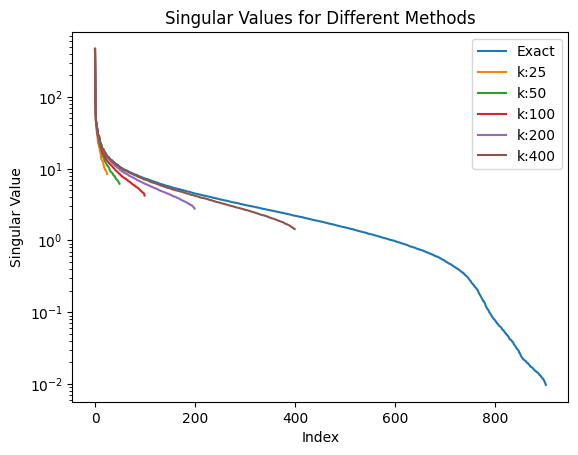

In [110]:
for key, value in results.items():
    plt.semilogy(value, label=key)


plt.title("Singular Values for Different Methods")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.legend()
plt.show()

# Analysis of Singular Values for Different Methods

1. **Exact SVD**:
   - The exact SVD (blue curve) displays all singular values, decreasing smoothly and steadily. 
   - This curve represents the true singular value spectrum of the data matrix.

2. **Randomized SVD**:
   - The curves for randomized SVD with ranks \(k = 25, 50, 100, 200, 400\) (orange, green, red, purple, brown) closely match the beginning of the exact singular value spectrum.
   - As \(k\) increases, the approximation improves and extends further into the spectrum.
   - For smaller \(k\) values (e.g., \(k=25, k=50\)), the randomized SVD captures only the leading singular values (high variance components) and truncates the rest.

3. **Logarithmic Scale**:
   - The semilogarithmic scale clearly shows the decay of singular values. This highlights how the randomized SVD approximates the leading singular values well, while the tail (lower singular values) is ignored for small \(k\).

- **Effectiveness of Randomized SVD**:
  - Randomized SVD is effective in approximating the leading singular values, making it a computationally efficient alternative for large-scale matrices.
  - For small \(k\), the reconstruction will focus only on the dominant components, which may suffice for dimensionality reduction tasks.

- **Trade-Off with \(k\)**:
  - Higher \(k\) provides better approximation but at increased computational cost. Selecting \(k\) depends on the desired balance between accuracy and efficiency.

The plot highlights the trade-off between rank approximation and computational resources, providing insight into how randomized SVD performs relative to exact SVD for different ranks.


2. **Compress the Image**:
    - Use the exact SVD to perform image compression for rank \( k = 25, 50, 100, 200, 400 \). Plot the compressed image and compute the reconstruction error as a function of \( k \) (use the matrix \( p \)-norm with \( p = 2 \)).
    - Repeat the same exercise by using the randomized SVD algorithm.
    - Repeat the same exercise by using the randomized SVD algorithm with a \( +50\% \) oversampling, that is by increasing by \( 50\% \) the number of columns in the matrix random \( P \) (round the quantity \( 1.5k \) to the closest integer).
    - Finally, plot the trend of the reconstruction error of the dataset as a function of \( k \) in the three cases. Comment on the results.

In [111]:
def reconstrunction_error(A, Ak):
    return np.linalg.norm(A - Ak, ord=2) / np.linalg.norm(A, ord=2)

### 2.1

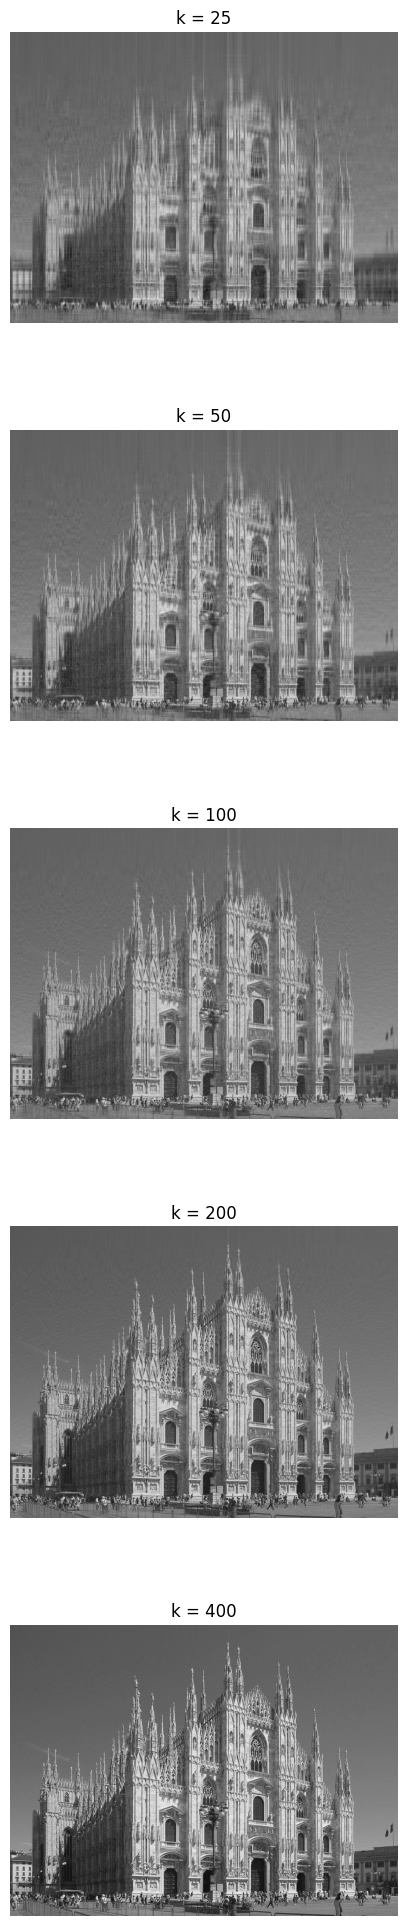

In [112]:
U, s, VT = np.linalg.svd(A, full_matrices=False)
fig, axs = plt.subplots(len(ks), 1, figsize=(5, 5 * len(ks)))

reconstrunction_errors = {}
i = 0
for k in ks:
    Ak = U[:,:k] @ np.diag(s[:k]) @ VT[:k, :]
    reconstrunction_errors[f"k:{k}"] = reconstrunction_error(A, Ak)
    axs[i].imshow(Ak, cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("k = %d" % k)
    i += 1




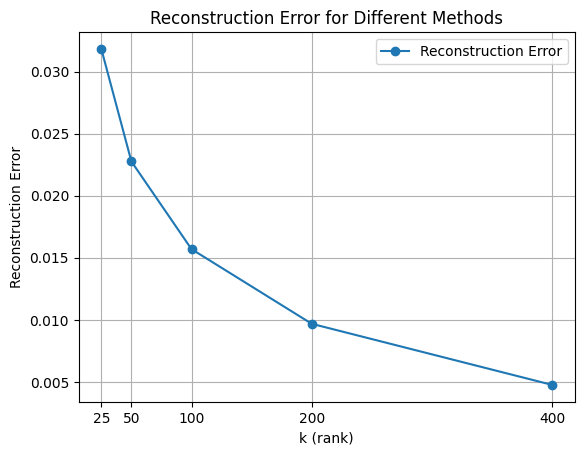

In [113]:
# Extract x and y values from the dictionary
x = [k for k in ks]  # Extract k values as integers
y = list(reconstrunction_errors.values())  # Corresponding reconstruction errors

# Plot the line connecting the points
plt.plot(x, y, marker='o', linestyle='-', label="Reconstruction Error")  # Line with points
plt.title("Reconstruction Error for Different Methods")
plt.xlabel("k (rank)")
plt.ylabel("Reconstruction Error")
plt.xticks(x)  # Set x-ticks to match the k values
plt.grid(True)
plt.legend()
plt.show()


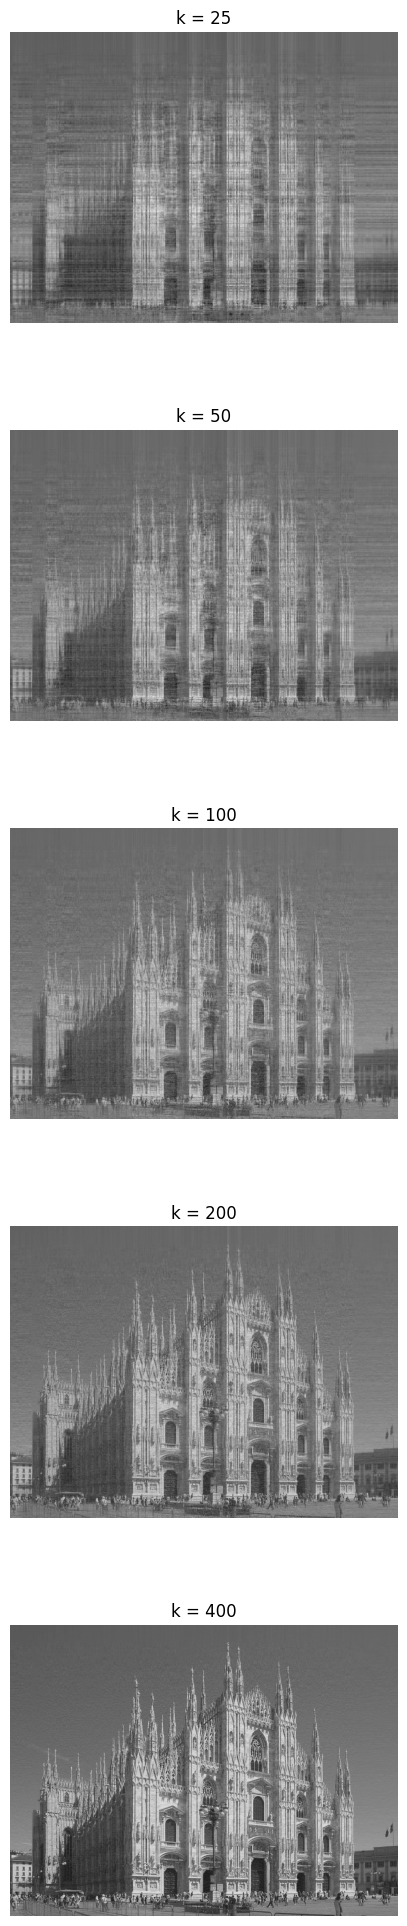

In [114]:
ks = [25, 50, 100, 200, 400]
fig, axs = plt.subplots(len(ks), 1, figsize=(5, 5 * len(ks)))

reconstrunction_errors_rsvd = {}

i = 0
for k in ks:
    rU, rs, rVT = randomized_SVD(A, k)
    Ak = rU @ np.diag(rs) @ rVT    
    reconstrunction_errors_rsvd[f"k:{k}"] = reconstrunction_error(A, Ak)
    axs[i].imshow(Ak, cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("k = %d" % k)
    i += 1


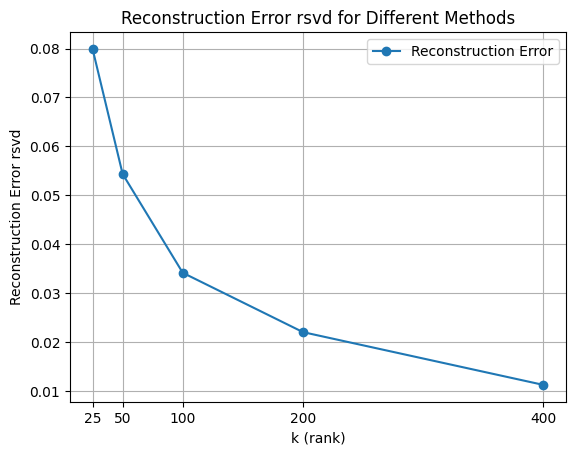

In [115]:
# Extract x and y values from the dictionary
x = [k for k in ks]  # Extract k values as integers
y = list(reconstrunction_errors_rsvd.values())  # Corresponding reconstruction errors

# Plot the line connecting the points
plt.plot(x, y, marker='o', linestyle='-', label="Reconstruction Error")  # Line with points
plt.title("Reconstruction Error rsvd for Different Methods")
plt.xlabel("k (rank)")
plt.ylabel("Reconstruction Error rsvd")
plt.xticks(x)  # Set x-ticks to match the k values
plt.grid(True)
plt.legend()
plt.show()


In [116]:
# default oversampling_size=1.5 is 50% of oversampling
def randomized_SVD_oversampling(A, k, oversampling_size=1.5):
    np.random.seed(0)
    m, n = A.shape
    # create a random matrix
    omega = np.random.rand(n, round(k * oversampling_size))
    Y = A @ omega
    Q, R = np.linalg.qr(Y)
    B = Q.T @ A
    # perform the SVD on B
    rU, rs, rVT = np.linalg.svd(B, full_matrices=False)
    # recover left singular values
    rU = Q @ rU
    return rU, rs, rVT

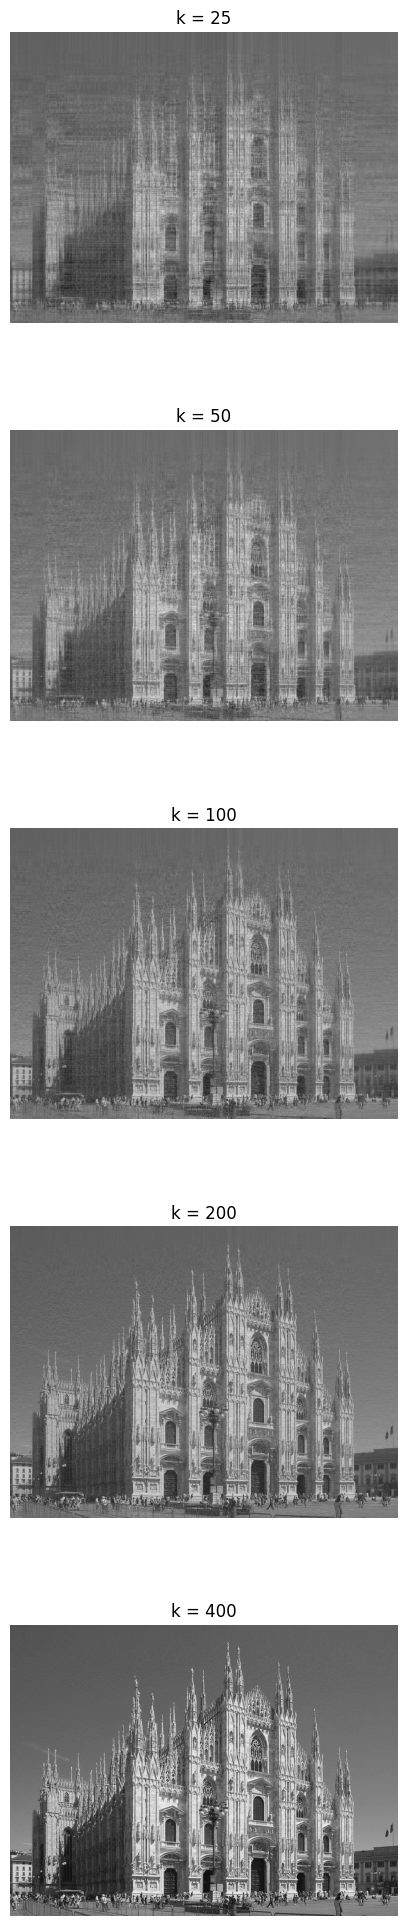

In [117]:
ks = [25, 50, 100, 200, 400]
fig, axs = plt.subplots(len(ks), 1, figsize=(5, 5 * len(ks)))

reconstrunction_errors_rsvd_os = {}

i = 0
for k in ks:
    rU, rs, rVT = randomized_SVD_oversampling(A, k)
    Ak = rU @ np.diag(rs) @ rVT    
    reconstrunction_errors_rsvd_os[f"k:{k}"] = reconstrunction_error(A, Ak)
    axs[i].imshow(Ak, cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("k = %d" % k)
    i += 1


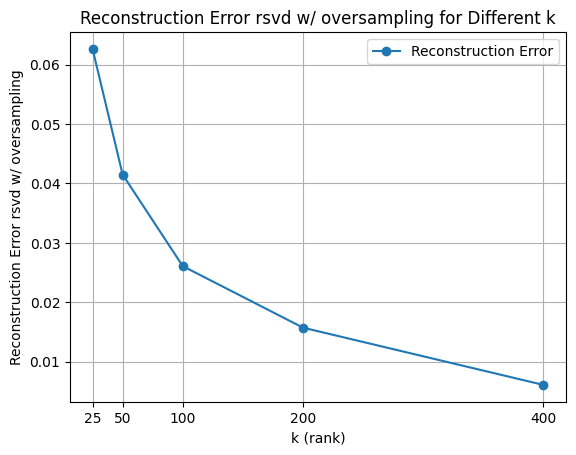

In [118]:
# Extract x and y values from the dictionary
x = [k for k in ks]  # Extract k values as integers
y = list(reconstrunction_errors_rsvd_os.values())  # Corresponding reconstruction errors

# Plot the line connecting the points
plt.plot(x, y, marker='o', linestyle='-', label="Reconstruction Error")  # Line with points
plt.title("Reconstruction Error rsvd w/ oversampling for Different k")
plt.xlabel("k (rank)")
plt.ylabel("Reconstruction Error rsvd w/ oversampling")
plt.xticks(x)  # Set x-ticks to match the k values
plt.grid(True)
plt.legend()
plt.show()


In [119]:
import pandas as pd

# Convert the dictionary into a DataFrame
df = pd.DataFrame.from_dict(reconstrunction_errors, orient='index', columns=['Reconstruction Error'])

# Reset the index to make "k:25", "k:50", etc., a column
df = df.reset_index().rename(columns={'index': 'Rank'})

# Display the DataFrame
print(df)


    Rank  Reconstruction Error
0   k:25              0.031823
1   k:50              0.022756
2  k:100              0.015693
3  k:200              0.009678
4  k:400              0.004753


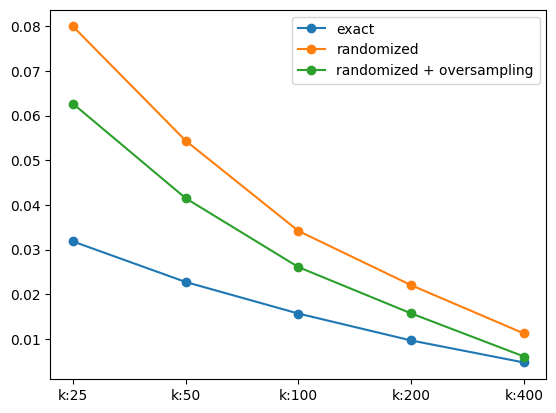

In [120]:
plt.plot(reconstrunction_errors.keys(), reconstrunction_errors.values(), "o-", label="exact")
plt.plot(reconstrunction_errors_rsvd.keys(), reconstrunction_errors_rsvd.values(), "o-", label="randomized")
plt.plot(
    reconstrunction_errors_rsvd.keys(), reconstrunction_errors_rsvd_os.values(), "o-", label="randomized + oversampling"
)
plt.legend()

3. **Evaluate Time Complexity**:
    - Evaluate the time needed to compute the SVD with the three approaches (SVD, randomized SVD, randomized SVD with oversampling) in the case \( k = 200 \).


In [121]:
import time

t0 = time.time()
U, s, VT = np.linalg.svd(A, full_matrices=False)
t1 = time.time()
exact_time = t1 - t0
print("Exact SVD took %f seconds" % exact_time)

Exact SVD took 1.532558 seconds


In [122]:

t0 = time.time()
rU, rs, rVT = randomized_SVD(A, 200)
t1 = time.time()
rand_time = t1 - t0
print("Randomized SVD took %f seconds" % rand_time)

Randomized SVD took 0.217919 seconds


In [123]:
t0 = time.time()
rU, rs, rVT = randomized_SVD_oversampling(A, 200)
t1 = time.time()
rand_oversampling_time = t1 - t0
print("Randomized SVD with oversampling took %f seconds" % rand_oversampling_time)

Randomized SVD with oversampling took 0.320977 seconds


As we expected, the time taken to compute the exact SVD is high when compared to the randomized SVD algorithms (with and without oversampling).